## Deep Convolutional Neural Network (DCNN)

### LeNet code in TnesorFlow 2.0

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import os

In [32]:
# network and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10 # number of outputs = number of digits

In [19]:
# define the convnet(LeNet)
def build(input_shape, classes):
    model = models.Sequential()
    
    # CONV -> RELU -> POOL
    model.add(layers.Convolution2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # CONV -> RELU -> POOL
    model.add(layers.Convolution2D(50, (5,5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # Flatten -> RELU layers
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    
    # a softmax classifier
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [33]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

'''
# use TensorBoard, princess Aurora!
callbacks = [
    # Write TensorBoard logs to './logs' directory
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
'''
# fit
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
#                    ,callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               400500    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

## Recognizing CIFAR-10 images with deep learning

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

In [4]:
# define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [5]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

# use TensorBoard
log_dir = 'D:\\project_minor\\python\\golbin2\\DeepLearningWithTensorflowAndKeras\\logs'
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=log_dir)]

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [8]:
score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 24us/sample - loss: 1.1414 - accuracy: 0.6585

Test score: 1.141379397201538
Test accuracy: 0.6585


### Improbing the CIFAR-10 performance with a deeper network

One way to improve the performance is to define a deeper network with multiple convolutional operations.  
1st module: (CONV+CONV+MaxPool+DropOut)  
2nd module: (CONV+CONV+MaxPool+DropOut)  
3rd module: (CONV+CONV+MaxPool+DropOut)  

#### Understanding Batch Normalization

BatchNormalization is another form of regularization and one of the most effective improvements proposed during the last few years.  
BatchNormalization enables us to accelerate training, in some cases by havling the training epochs, and it offers some regularization.  
During training, weights in early layers naturally change and therefore the inputs of later layers can significantly change. In other words, each layer must continuously re-adjust its weights to the different distribution for every batch. This may slow down the model's training greatly. The key idea is to make layer inputs more similar in distribution, batch after batch and epoch after epoch.  
Another issue is that the sigmoid activation function works very well close to zero, but tends to "get stuck" when values get sufficiently far away from zero. If, occasionally, neuron outputs fluctuate far away from the sigmoid zero, then said neuron becomes unable to update its own weights.  
The other key idea is therefore to transform the layer outputs into a Gaussian distribution unit close to zero. In this way, layers will have significantly less variation from batch to batch. Mathematically, the formula is very simple. The activation input $x$ is centered around zero by subtracting the batch mean $\mu$ from it. Then, the result is divided by $\sigma + \epsilon$ to prevent division by zero. Then, we use a linear transformation $y = \lambda x + \beta$ to make sure that the normalizing effect is applied during training.  
In this way, $\lambda$ and $\beta$ are parameters that got optimized during the training phase in a similar way to any other layer. BatchNormalization has been proven as a very effective way to increase both the speed of training and accuracy, because it helps to prevent activations becoming either too small and vanishing or too big and exploding.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
EPOCHS=50
NUM_CLASSES = 10

In [4]:
# define the convnet
def build_model():
    model = models.Sequential()
    
    # 1st block
    model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))
    
    # 2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    
    # 3rd block
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))
    
    # dense
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

In [5]:
def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # normalize
    mean = np.mean(x_train, axis=(0,1,2,3))
    std = np.std(x_train, axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
    
    y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)
    return x_train, y_train, x_test, y_test

In [6]:
(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [12]:
# train
batch_size = 64
model.fit(x_train, y_train, batch_size=batch_size, epochs=EPOCHS, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 211us/sample - loss: 1.7387 - accuracy: 0.4858 - val_loss: 1.4445 - val_accuracy: 0.5786
Epoch 2/50
50000/50000 [==============================] - 6s 128us/sample - loss: 1.1281 - accuracy: 0.6437 - val_loss: 1.3431 - val_accuracy: 0.6194
Epoch 3/50
50000/50000 [==============================] - 7s 131us/sample - loss: 0.8686 - accuracy: 0.7096 - val_loss: 0.7684 - val_accuracy: 0.7382
Epoch 4/50
50000/50000 [==============================] - 7s 131us/sample - loss: 0.7509 - accuracy: 0.7488 - val_loss: 0.7502 - val_accuracy: 0.7458
Epoch 5/50
50000/50000 [==============================] - 6s 130us/sample - loss: 0.6645 - accuracy: 0.7759 - val_loss: 0.6236 - val_accuracy: 0.7837
Epoch 6/50
50000/50000 [==============================] - 7s 132us/sample - loss: 0.6032 - accuracy: 0.7961 - val_loss: 0.6454 - val_accuracy: 0.7891
Epoch 7/50
50000/50000 [=========================

NameError: name 'BATCH_SIZE' is not defined

In [14]:
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 52us/sample - loss: 0.5155 - accuracy: 0.8560

Test score: 0.5155008586883545
Test accuracy: 0.856


### Improving the CIFAR-10 performance with data augmentation

Another way to improve the performance is to generate more images for our training. The idea here is that we can take the standard CIFAR training set and augment this set with multiple types of transformation, including rotation, rescaling, horizontal or vertical flip, zooming, channel shift, and many more.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

**`rotation-ragne`** is a value in degrees (0-180) for randomly rotating pictures; **`width_shift`** and **`height_shift`** are ranges for randomly translating pictures vertically or horizontally. **`zoom_range`** is for randomly zooming pictures; **`horizontal_flip`** is for randomly flipping half of the images horizontally; and **`fill_mode`** is the strategy used for filling in new pixels that can appear after a rotation or a shift.

Now we can apply this intuition directly for training. For efficiency, the generator runs in parallel to the model. This allows image augmentation on a CPU while training in parallel on a GPU.

In [9]:
# train
batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=EPOCHS, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 782 steps, validate on 10000 samples
Epoch 1/50
782/782 [==============================] - 22s 29ms/step - loss: 2.1419 - accuracy: 0.3515 - val_loss: 1.5328 - val_accuracy: 0.4851
Epoch 2/50
782/782 [==============================] - 19s 24ms/step - loss: 1.5548 - accuracy: 0.4842 - val_loss: 1.4076 - val_accuracy: 0.5558
Epoch 3/50
782/782 [==============================] - 19s 24ms/step - loss: 1.2995 - accuracy: 0.5552 - val_loss: 1.0591 - val_accuracy: 0.6457
Epoch 4/50
782/782 [==============================] - 19s 24ms/step - loss: 1.1431 - accuracy: 0.6007 - val_loss: 1.0455 - val_accuracy: 0.6492
Epoch 5/50
782/782 [==============================] - 19s 24ms/step - loss: 1.0395 - accuracy: 0.6357 - val_loss: 0.9141 - val_accuracy: 0.6950
Epoch 6/50
782/782 [==============================] - 19s 24ms/step - loss: 0.9690 - accuracy: 0.6605 - val_loss: 0.8494 - val_accur

In [16]:
# save to disk
model_json = model.to_json()
with open('./models/cifar10_architecture.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('./models/cifar10_weights.h5')

In [11]:
#test
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))

10000/10000 [==============================] - 1s 53us/sample - loss: 0.5647 - accuracy: 0.8252

Test result: 82.520 loss: 0.565


A list of state-of-the-art results for CIFAR-10 is available online (http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). As of April 2019, the best result has an accuracy of 96.53%.

### Predicting with CIFAR-10

Let's suppose the we want to use the deep learning model we just trained for CIFAR-10 for a bulk evaluation of images.

In [14]:
import numpy as np
from skimage.transform import resize
from imageio import imread
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

In [18]:
# load model
model_architecture = './models/cifar10_architecture.json'
model_weights = './models/cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

In [21]:
# load images
dir = 'D:/project_minor/python/golbin2/DeepLearningWithTensorflowAndKeras/sources/Chapter 4/'
img_names = [dir+'cat-standing.jpg', dir+'dog.jpg']
imgs = [resize(imread(img_name), (32, 32)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255
print('imgs.shape:', imgs.shape)

imgs.shape: (2, 32, 32, 3)


In [22]:
# train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

In [23]:
# predict
predictions = model.predict_classes(imgs)
print('predictions:', predictions)

predictions: [0 0]


## Very deep convolutional networks for large-scale image recognition

the ImageNet ILSVRC-2012 ( http://image-net.org/challenges/LSVRC/2012/ ) dataset, which includes images of 1,000 classes, and is split into three sets: training (1.3 million images), validation (50,000 images), and testing (100,000 images). Each image is (224×224) on 3 channels. The model achieves 7.5% top-5 error on ILSVRC-2012-val, 7.4% top-5 error on ILSVRC-2012-test.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [34]:
# define a VGG16 network
def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1,1), input_shape=(244,244,3)))
    model.add(layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(layers.Flatten())
    # top layer of the VGG net
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)
    return model

We have implemented a VGG16. Next, we are going to utilize it.

### Recognizing cats with a VGG16 Net

Now let us test the image of a cat.  
Note that we are going to use predefined weights

In [14]:
import cv2
import numpy as np
import os

In [38]:
dir = dir = 'D:/project_minor/python/golbin2/DeepLearningWithTensorflowAndKeras/sources/Chapter 4/'
im = cv2.resize(cv2.imread(dir + 'cat.jpg'), (244, 244)).astype(np.float32)

In [39]:
#im = im.transpose((2, 0, 1))
im = np.expand_dims(im, axis=0)

In [31]:
# Test pretrained model
path_file = 'D:/project_minor/python/golbin2/DeepLearningWithTensorflowAndKeras/sources/Chapter 4/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

In [35]:
model = VGG_16(path_file)

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_22 (ZeroPaddi (None, 246, 246, 3)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 244, 244, 64)      1792      
_________________________________________________________________
zero_padding2d_23 (ZeroPaddi (None, 246, 246, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 244, 244, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 122, 122, 64)      0         
_________________________________________________________________
zero_padding2d_24 (ZeroPaddi (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 122, 122, 128)    

In [40]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))

285


When the code is executed, the class 285 is returned, which corresponds to "Egyptiam cat"
(https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

## Utilizing tf.keras built-in VGG16 Net module

**`tf.keras`** applications are prebuilt and pretrained deep learning models. Weights are downloaded automatically when instantiating a model and stored at **`~/.keras/models/~`**. Using built-in code is very easy:

In [21]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [23]:
# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 167s 0us/step


In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [27]:
# resize into VGG16 trained images' format
dir = 'D:/project_minor/python/golbin2/DeepLearningWithTensorflowAndKeras/sources/Chapter 4/'
im = cv2.resize(cv2.imread(dir + 'steam-locomotive.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)
im.astype(np.float32)

array([[[[159., 148., 146.],
         [170., 156., 149.],
         [169., 150., 144.],
         ...,
         [159., 139., 122.],
         [155., 136., 119.],
         [160., 140., 123.]],

        [[163., 151., 147.],
         [193., 178., 171.],
         [190., 171., 164.],
         ...,
         [155., 132., 116.],
         [158., 133., 117.],
         [158., 134., 118.]],

        [[166., 153., 144.],
         [163., 148., 140.],
         [174., 157., 148.],
         ...,
         [158., 135., 117.],
         [153., 127., 111.],
         [159., 135., 119.]],

        ...,

        [[ 91.,  99., 106.],
         [ 48.,  60.,  63.],
         [ 33.,  32.,  38.],
         ...,
         [132., 123., 132.],
         [169., 168., 172.],
         [158., 153., 158.]],

        [[  8.,  10.,  18.],
         [ 18.,  15.,  23.],
         [  0.,   2.,   7.],
         ...,
         [161., 157., 162.],
         [168., 158., 164.],
         [157., 146., 152.]],

        [[105., 105., 120.],
       

820


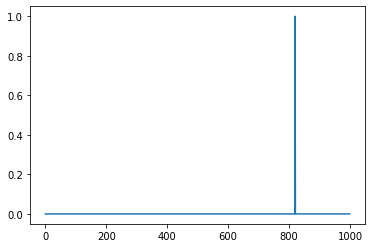

In [29]:
# predict
out = model.predict(im)
index = np.argmax(out)
print(index)
plt.plot(out.ravel())
plt.show()
# this should print 820 for steaming train

All the other classes have very weak support, as shown in the preceding figure  
VGG16 is only one of the modules that is prebuilt in **`tf.keras`**. A full list of pretrained models is available online (https://www.tensorflow.org/api_docs/python/tf/keras/applications).


## Recycling prebuilt deep learning models for extracting features

One very simple idea is to use VGG16, and more generally DCNN, for feature extraction. This code implements the idea by extracting features from a specific layer. Note that we need to switch to the functional API since the sequential model only accepts layers:

In [42]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

In [43]:
# prebuild model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
print(base_model)

In [44]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

0 input_3 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [47]:
# extract features from block4_pool block
model = models.Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)
dir = 'D:/project_minor/python/golbin2/DeepLearningWithTensorflowAndKeras/sources/Chapter 4/'
img_path = dir + 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))

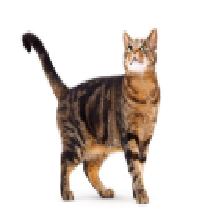

In [48]:
img

In [53]:
x = image.img_to_array(img)

In [54]:
x.shape

(224, 224, 3)

In [55]:
x = np.expand_dims(x, axis=0)

In [56]:
x.shape

(1, 224, 224, 3)

In [57]:
x = preprocess_input(x)

In [60]:
# get the features from this block
features = model.predict(x)
print(features)

[[[[  0.         0.        39.127655 ...   0.         0.
      0.      ]
   [  0.         0.         0.       ...   0.       261.40973
      0.      ]
   [  0.         0.         0.       ...   0.       376.41425
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       175.46494
      0.      ]
   [  0.         0.        32.00825  ...   0.         0.
      0.      ]
   [  0.         0.        76.28149  ...   0.         0.
      0.      ]]

  [[  0.         0.         0.       ...   0.        50.92023
      0.      ]
   [  0.         0.        44.452904 ...   0.       123.95452
      0.      ]
   [  0.         0.        27.892153 ...   0.       573.44165
      0.      ]
   ...
   [  0.         0.         0.       ...   0.       683.4282
      0.      ]
   [  0.         0.         0.       ...   0.        18.34751
      0.      ]
   [  0.         0.        60.561913 ...   0.         0.
      0.      ]]

  [[  0.         0.        27.617643 ...   0.         0.
      0.  

You might wonder why we wnat to extract the features from an intermediate layer in a DCNN. The reasoning is that as the network learns to classify images into categories, each layer learns to identify the features that are necessary to perform the final classification. Lower layers identify lower-order features such as color and edges, and higher layers compose these lower-order features into higher-order features such as shapes or objects. Hence, the intermediate layer has the capability to extract important features from an image, and these features are more likely to help in different kinds of classification.  
This has multiple advantages. Fist, we can rely on publicly available large-scale training and transfer this learning to novel domains. Second, we can save time for expensive large training. Third, we can provide reasonable solutions even when we don't have a large number of training examples for our domain. We also get a good starting network shape for the task at hand, instead of guessing it.